In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os
import sys
%matplotlib inline

In [31]:
mpl.rcParams.update({'text.usetex': True,
                     'text.color':'k',
                     'lines.linewidth': 4,
                     'lines.markersize': 12,
                     'font.size': 34, 
                     'font.family': 'FreeSerif',
                     'axes.grid': True,
                     'axes.facecolor' :'w',
                     'axes.labelcolor':'k',
                     'axes.titlesize': 24,
                     'axes.labelsize': 24,
                     'axes.prop_cycle':plt.cycler(color=plt.cm.Set2.colors),
                     'xtick.color':'k',
                     'xtick.labelsize': 24,
                     'ytick.color':'k',
                     'ytick.labelsize': 24,
                     'grid.color': '#555555',
                     'legend.facecolor':'w',
                     'legend.fontsize': 24,
                     'legend.borderpad': 0.6,
                     'figure.figsize': (16, 12),
                     'figure.facecolor' : 'w'})

In [48]:
datesArray = np.array(['Apr\n24', 'Apr\n25', 'Apr\n26', 
                       'Apr\n30', 'May\n01', 'May\n02', 'May\n03', 'May\n04',
                       'May\n07', 'May\n08', 'May\n09', 'May\n10', 'May\n12',
                       'May\n14', 'May\n16',
                       'May\n21', 'May\n22', 'May\n23', 'May\n24', 'May\n25'])

pushupTimes = np.array(['3:04', '3:09', '3:20',
                        '3:23', '2:50', '2:58', '3:00', '2:56',
                        '3:02', '2:52', '2:51', '2:36', '2:45',
                        '2:47', '2:50',
                        '2:55', '2:46', '2:48', '2:47', '2:52'])

situpTimes =  np.array(['3:46', '3:32', '3:58',
                        '3:22', '3:22', '3:26', '3:26', '3:20',
                        '3:20', '2:56', '2:56', '2:42', '3:42',
                        '3:16', '3:14',
                        '3:14', '3:03', '2:52', '2:51', '2:47'])

squatTimes =  np.array(['2:15', '2:16', '2:15',
                        '2:12', '2:09', '2:13', '2:07', '2:11',
                        '2:11', '2:05', '2:12', '2:15', '2:18',
                        '2:17', '2:04',
                        '2:15', '2:13', '2:00', '2:08', '2:37'])

alcoholicDrinks = np.array([1, 0, 0,
                            1, 0, 0, 1, 4,
                            0, 0, 3, 2, 6,
                            3, 3,
                            3, 0, 0])
workoutTimes = {
    '100 Pushups': pushupTimes,
    '100 Situps': situpTimes,
    '100 Squats': squatTimes}

In [49]:
def timeStr2float(listTimeStr):
    ''' Takes in list of strings, finds the colon, does some math, returns list of floats'''
    listTimes = np.array([])
    for timeStr in listTimeStr:
        splits = timeStr.split(':')
        minutes = float(splits[0])
        seconds = float(splits[1])
        total = 60.0*minutes + seconds
        listTimes = np.append(listTimes, total)
    return listTimes

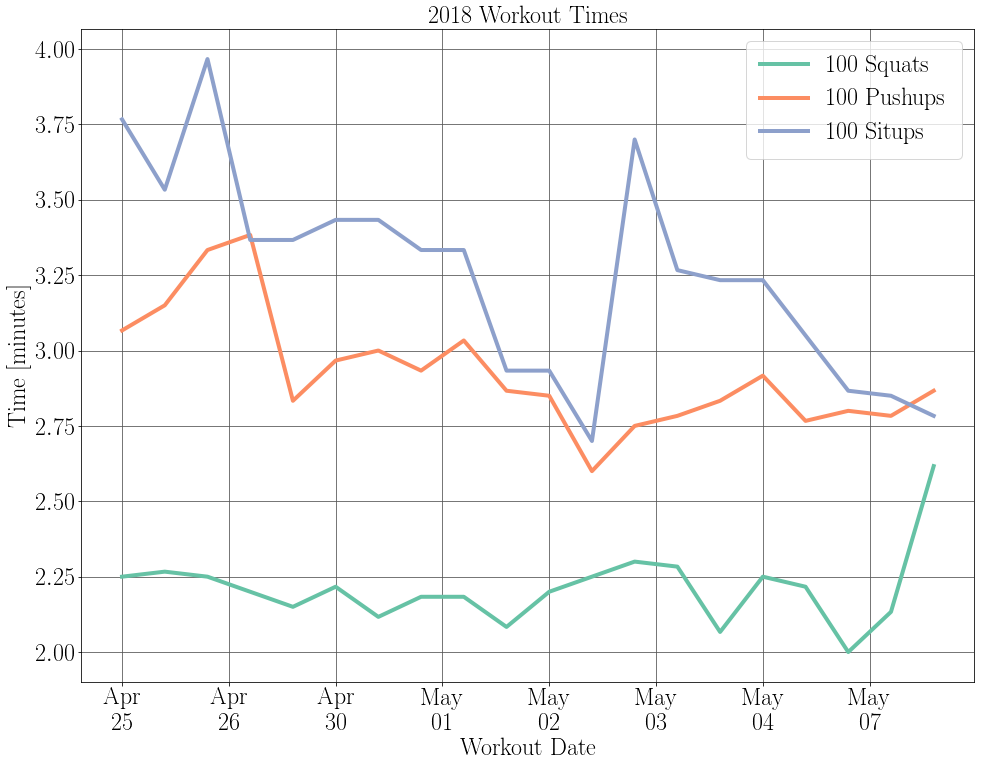

In [50]:
xx = np.arange(len(datesArray))
fig = plt.figure(figsize=(16,12))
s1 = plt.subplot(111)

for key in workoutTimes.keys():
    s1.plot(xx, timeStr2float(workoutTimes[key])/60.0, label=key)
    
# ss1 = s1.twinx()
# ss1.plot(xx, alcoholicDrinks, 'o', color=plt.cm.Set2.colors[3], label='Alcoholic Drinks')
# ss1.set_ylabel('Alcoholic Drinks')
# ss1.grid(ls='--')
# ss1.legend(loc='upper center')
    
s1.set_title('2018 Workout Times')
s1.set_xlabel('Workout Date')
s1.set_xticklabels(datesArray)
s1.set_ylabel('Time [minutes]')
s1.legend(loc='best')

plt.savefig('./plots/{0}_100Pushup_100Situp_100Squat_WorkoutTimes.pdf'.format(time.strftime("%Y%m%d")), bbox_inches='tight')
plt.show()